## Case Study titanic - 25.06.21

# EDA - Exploratory Data Analysis

In [2]:
# found the business problem - build the algo...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [12]:
df = pd.read_csv("titanic.csv", sep = ',', index_col=0)

In [13]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [ ]:
# p value, rfp

In [14]:
df.tail(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [48]:
df.isnull().sum() / df.count() * 100

Survived      0.000000
Pclass        0.000000
Name          0.000000
Sex           0.000000
Age          24.789916
SibSp         0.000000
Parch         0.000000
Ticket        0.000000
Fare          0.000000
Cabin       336.764706
Embarked      0.224972
dtype: float64

In [47]:
df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [18]:
df.describe(include = "all")
# df.describe(include = np.object)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Trout, Mrs. William H (Jessie L)",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [19]:
df['Name'].sort_values()

PassengerId
846                      Abbing, Mr. Anthony
747              Abbott, Mr. Rossmore Edward
280         Abbott, Mrs. Stanton (Rosa Hunt)
309                      Abelson, Mr. Samuel
875    Abelson, Mrs. Samuel (Hannah Wizosky)
                       ...                  
287                  de Mulder, Mr. Theodore
283                de Pelsmaeker, Mr. Alfons
362                del Carlo, Mr. Sebastiano
154          van Billiard, Mr. Austin Blyler
869              van Melkebeke, Mr. Philemon
Name: Name, Length: 891, dtype: object

In [20]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
for i in df.columns : 
    print(i, " = \n", df[i].unique())

Survived  = 
 [0 1]
Pclass  = 
 [3 1 2]
Name  = 
 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Al

In [25]:
abc = df.drop_duplicates()

In [26]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [27]:
df.shape

(891, 11)

In [28]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
p_var = df.Pclass.value_counts()
p_var

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [33]:
type(p_var)

pandas.core.series.Series

In [36]:
plt.pie(x = p_var.values(), labels=p_var.index())
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [38]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [41]:
# Queries

df[df['Name'] == "Moran, Mr. James"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [45]:
df[df['Name'] == "Moran, Mr. James"][["Name", "Pclass", "Survived"]]

,Name,Pclass,Survived
PassengerId,,,
6,"Moran, Mr. James",3,0


In [46]:
df[df.Fare == df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [52]:
# df[df.Embarked == df.Embarked.isnull()]

In [53]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### univariate analysis - exploring one column at a time

In [55]:
df['Pclass'].value_countsounts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [59]:
df[df['Pclass'] == 3].shape

(491, 11)

In [60]:
# numerical cols

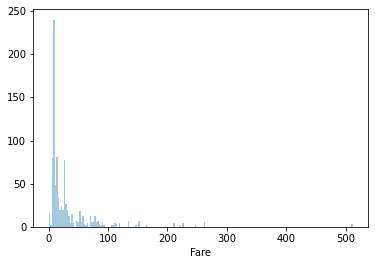

In [64]:
sb.distplot(df.Fare, kde = False, bins = 200)

In [75]:
df[(df.Fare > 5) & (df.Fare < 10)].shape

(319, 11)

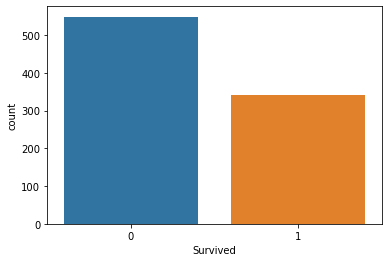

In [77]:
# categorical cols

sb.countplot(x = "Survived", data = df)

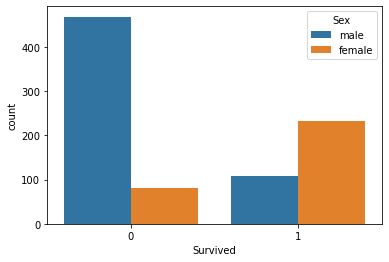

In [78]:
sb.countplot(x = "Survived", data = df, hue = "Sex")

In [ ]:
# bivariate analysis - exploring two cols at a time
# num vs num
# at vs num
# cat vs cat


In [79]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


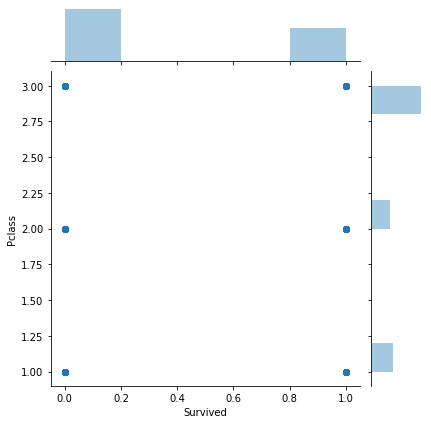

In [80]:
sb.jointplot(df.Survived, df.Pclass)

In [87]:
# plt.subplot(1,2,1)
# sb.jointplot(df.Age, df.Fare, color='blue', kind = "hexbin")
# plt.show()

# plt.subplot(1,2,2)
# sb.jointplot(df.Age, df.Fare, color='blue', kind = "scatter")
# plt.show()

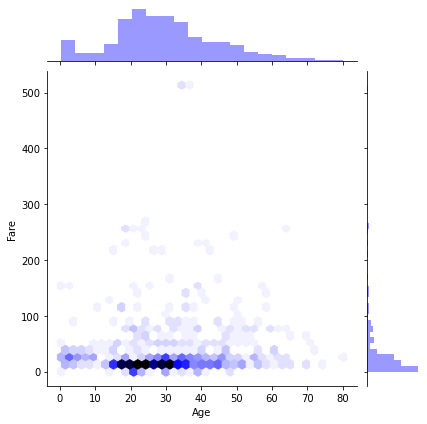

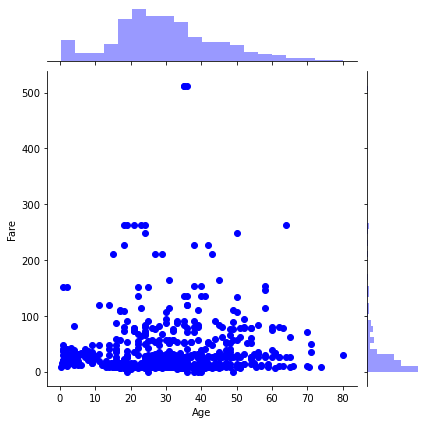

In [88]:
sb.jointplot(df.Age, df.Fare, color='blue', kind = "hexbin")

sb.jointplot(df.Age, df.Fare, color='blue', kind = "scatter")


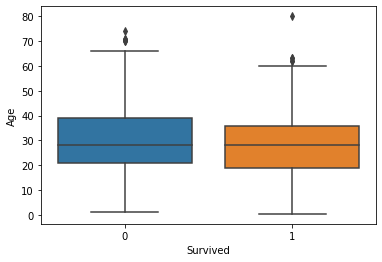

In [89]:
# cat vs num

# boxplot, barplot, swarmplot, stripplot, violinplot

sb.boxplot(x = df.Survived, y  = df.Age)

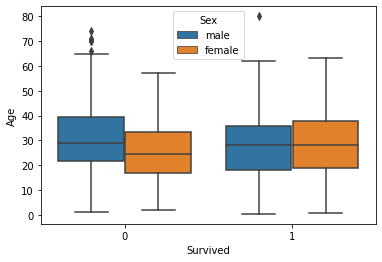

In [92]:
sb.boxplot(x = df.Survived, y  = df.Age, hue = df.Sex)

In [ ]:
sb.boxplot(x = df.Survived, y  = df.Fare, hue = df.Sex)

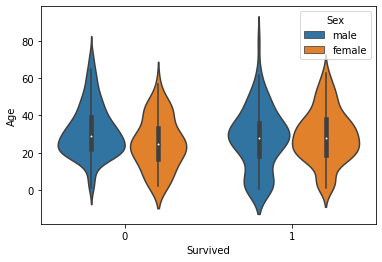

In [96]:
sb.violinplot(x = df.Survived, y  = df.Age, hue = df.Sex)

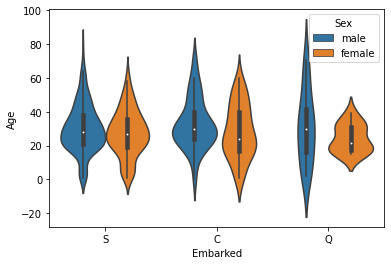

In [97]:
#sb.violinplot(x = df.Embarked, y  = df.Age, hue = df.Sex, width = 0.2)
sb.violinplot(x = df.Embarked, y  = df.Age, hue = df.Sex, width = 0.8)

In [99]:
df.Age.sort_values()

PassengerId
804    0.42
756    0.67
645    0.75
470    0.75
79     0.83
       ... 
860     NaN
864     NaN
869     NaN
879     NaN
889     NaN
Name: Age, Length: 891, dtype: float64

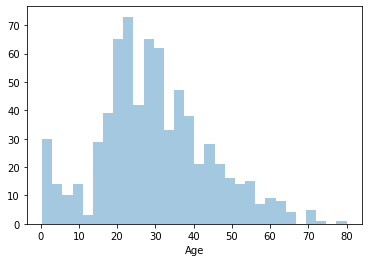

In [100]:
sb.distplot(df.Age, kde = False, bins = 30)

In [110]:
df1 = df.copy()

In [111]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df1.Age.fillna(value = df1.Age.mean(), inplace=True)

In [103]:
df1.Age.mean()

29.69911764705882

In [108]:
df1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

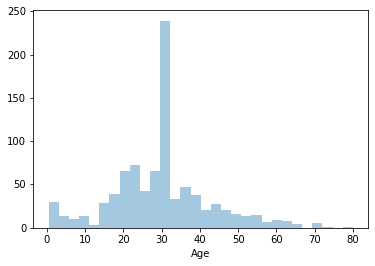

In [113]:
sb.distplot(df1.Age, kde = False, bins = 30)

In [114]:
df2 = df.copy()

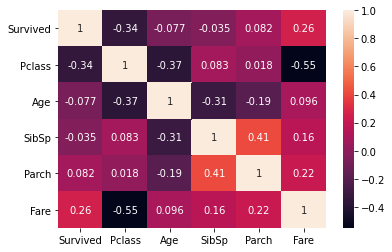

In [117]:
sb.heatmap(df2.corr(), annot = True)

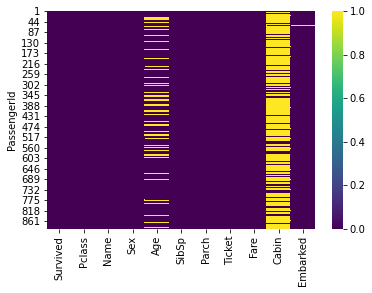

In [119]:
# sb.heatmap(df2.isnull(), annot = True)

sb.heatmap(df2.isnull(), cmap = 'viridis')

In [121]:
def fun(c) : 
    age = c[0]
    pclass = c[1]
    
    if pd.isnull(age) : 
        if pclass == 1 : 
            return 37
        elif pclass == 2 : 
            return 29
        else : 
            return 25
    else : 
        return age

In [122]:
df2.Age = df[["Age", 'Pclass']].apply(fun, axis = 1)

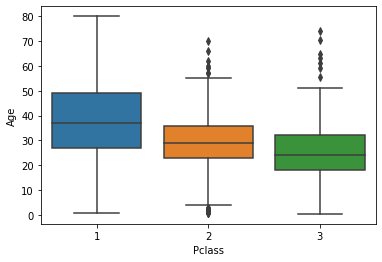

In [120]:
sb.boxplot(x = "Pclass", y = 'Age', data = df2)

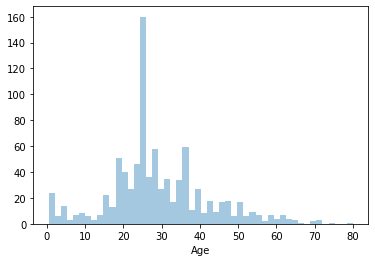

In [124]:
sb.distplot(df2.Age, kde = False, bins = 50)

In [125]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
df.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [127]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [128]:
#Nitish - 100 lines - 80
#competitor - 80 lines - 80

In [130]:
df['Family'] = df['SibSp'] + df["Parch"]

In [133]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1
3,1,3,female,26.0,7.9250,S,0
4,1,1,female,35.0,53.1000,S,1
5,0,3,male,35.0,8.0500,S,0


In [132]:
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [134]:
# cat to num


In [ ]:
emb_ = pd.get_dummies(df.Embarked)
emb_.head()

In [136]:
emb_ = pd.get_dummies(df.Embarked, drop_first=True)
emb_.head()

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [139]:
df = pd.concat([df, emb_], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Family,Q,S,Q,S
PassengerId,,,,,,,,,,
1,0,3,male,22.0,7.2500,1,0,1,0,1
2,1,1,female,38.0,71.2833,1,0,0,0,0
3,1,3,female,26.0,7.9250,0,0,1,0,1
4,1,1,female,35.0,53.1000,1,0,1,0,1
5,0,3,male,35.0,8.0500,0,0,1,0,1


In [138]:
df.drop(['Embarked'], axis = 1, inplace = True)

In [ ]:
# degrees of freedom